<a href="https://colab.research.google.com/github/KoushaAm/MachineLearning/blob/main/CNNBinary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Convolutional Neural Networks and Visiaon with Tensorflow

Uses binary classification to differetiate between images of steak and pizza

In [1]:
# get the data 

import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-04-26 05:01:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   135MB/s    in 0.8s    

2023-04-26 05:01:37 (135 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [4]:
import os

for dirpath, dirname, filename in os.walk("pizza_steak"): 
  print(f"there are {len(dirname)} directories and {len(filename)} images in {dirpath}")

there are 2 directories and 0 images in pizza_steak
there are 2 directories and 0 images in pizza_steak/test
there are 0 directories and 250 images in pizza_steak/test/steak
there are 0 directories and 250 images in pizza_steak/test/pizza
there are 2 directories and 0 images in pizza_steak/train
there are 0 directories and 750 images in pizza_steak/train/steak
there are 0 directories and 750 images in pizza_steak/train/pizza


In [5]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr 26 05:01 .
drwxr-xr-x 1 root root 4096 Apr 26 05:01 ..
drwxr-xr-x 4 root root 4096 Apr 26 05:01 test
drwxr-xr-x 4 root root 4096 Apr 26 05:01 train


In [6]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [7]:
# to visualize our images first let's get the class names programmatically 

import pathlib 
import numpy as np 

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))

print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class): 

  # construct a directory address
  target_folder = target_dir + target_class
  
  #get random image
  random_image = random.sample(os.listdir(target_folder), 1)

  #read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape: {img.shape}")

  return img

  

image shape: (512, 512, 3)


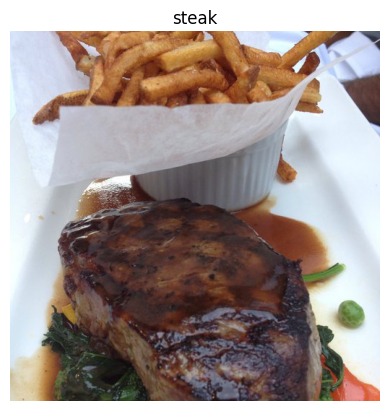

In [9]:
img = view_random_image(target_dir = "pizza_steak/train/", 
                        target_class = "steak")

In [10]:
import tensorflow as tf
tf.constant(img) , img

(<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
 array([[[216, 231, 252],
         [217, 232, 253],
         [218, 233, 254],
         ...,
         [ 84,  88, 100],
         [ 89,  93, 105],
         [ 94,  98, 110]],
 
        [[213, 228, 249],
         [215, 230, 251],
         [216, 231, 252],
         ...,
         [ 85,  88, 103],
         [ 87,  91, 103],
         [ 89,  93, 105]],
 
        [[209, 224, 245],
         [211, 226, 247],
         [214, 229, 250],
         ...,
         [ 85,  91, 105],
         [ 86,  89, 104],
         [ 86,  89, 104]],
 
        ...,
 
        [[215, 212, 195],
         [216, 213, 196],
         [217, 214, 195],
         ...,
         [225, 109,  60],
         [220, 109,  56],
         [216, 106,  53]],
 
        [[217, 214, 197],
         [217, 214, 197],
         [218, 215, 196],
         ...,
         [227, 116,  63],
         [227, 117,  64],
         [224, 117,  61]],
 
        [[218, 215, 198],
         [218, 215, 198],
         [219,

In [11]:
img.shape

(512, 512, 3)

In [12]:
# divide all pictures by 225 to be between 0 to 1
img/255

array([[[0.84705882, 0.90588235, 0.98823529],
        [0.85098039, 0.90980392, 0.99215686],
        [0.85490196, 0.91372549, 0.99607843],
        ...,
        [0.32941176, 0.34509804, 0.39215686],
        [0.34901961, 0.36470588, 0.41176471],
        [0.36862745, 0.38431373, 0.43137255]],

       [[0.83529412, 0.89411765, 0.97647059],
        [0.84313725, 0.90196078, 0.98431373],
        [0.84705882, 0.90588235, 0.98823529],
        ...,
        [0.33333333, 0.34509804, 0.40392157],
        [0.34117647, 0.35686275, 0.40392157],
        [0.34901961, 0.36470588, 0.41176471]],

       [[0.81960784, 0.87843137, 0.96078431],
        [0.82745098, 0.88627451, 0.96862745],
        [0.83921569, 0.89803922, 0.98039216],
        ...,
        [0.33333333, 0.35686275, 0.41176471],
        [0.3372549 , 0.34901961, 0.40784314],
        [0.3372549 , 0.34901961, 0.40784314]],

       ...,

       [[0.84313725, 0.83137255, 0.76470588],
        [0.84705882, 0.83529412, 0.76862745],
        [0.85098039, 0

In [13]:
# an end to end example

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#preprocess data (get all of the pixel values between 0 to 1)
train_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)


train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

#import data from directories and turn it into batches for training
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size = 32, 
                                               target_size=(224, 224), 
                                               class_mode = "binary", 
                                               seed = 42)

#import data from directories and turn it into batches for testing 
valid_data = valid_datagen.flow_from_directory(directory=test_dir, 
                                               batch_size = 32, 
                                               target_size=(224, 224), 
                                               class_mode = "binary", 
                                               seed = 42)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


make sure you run this on GPU it's faster

In [14]:
#build a cnn model (same as the tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential ([
    tf.keras.layers.Conv2D(filters = 10, 
                           kernel_size = 3, # filter's size, dimensions of sliding window over input
                           activation = 'relu', 
                           input_shape = (224, 224, 3)), # w = 224, h = 224, color channel = 3 (rgb)
    
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'), # extract features that distinguish different images from one another (2D for wxh input with c channel)
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"), # converse the pixels within the access of activation function if kernel is beyong activation map (eg. 'same', 'valid'), same adds zero to outside of img, valid cuts off excess pixels
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'), 
    tf.keras.layers.MaxPool2D(2), 
    tf.keras.layers.Flatten(), # converts a 3D layer in the ntwork into a 1D vector to fit input of fully conncted layer for classification
    tf.keras.layers.Dense(1, activation = 'sigmoid')                                               
                          
])

#stride: how many pixels the kernel should be shifted over at a time

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
               optimizer = tf.keras.optimizers.Adam(), 
               metrics = ['accuracy'])


history_1 = model_1.fit(train_data, 
            epochs = 5, 
            steps_per_epoch = len(train_data), 
            validation_data = valid_data, 
            validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 28s 242ms/step - loss: 0.6130 - accuracy: 0.6660 - val_loss: 0.4815 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 14s 296ms/step - loss: 0.4914 - accuracy: 0.7653 - val_loss: 0.4195 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 12s 248ms/step - loss: 0.4078 - accuracy: 0.8160 - val_loss: 0.3691 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3783 - accuracy: 0.8373 - val_loss: 0.3736 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3197 - accuracy: 0.8707 - val_loss: 0.3031 - val_accuracy: 0.8820


In [15]:
len(train_data) # --> 1500 (all images) / 32 (batch size) = 42 num of batches

47

In [16]:
train_data[0]

(array([[[[0.03529412, 0.03529412, 0.07450981],
          [0.03529412, 0.03529412, 0.07450981],
          [0.03529412, 0.03529412, 0.07450981],
          ...,
          [0.03529412, 0.03529412, 0.07450981],
          [0.03529412, 0.03529412, 0.07450981],
          [0.03529412, 0.03529412, 0.07450981]],
 
         [[0.03529412, 0.03529412, 0.07450981],
          [0.03529412, 0.03529412, 0.07450981],
          [0.03529412, 0.03529412, 0.07450981],
          ...,
          [0.03529412, 0.03529412, 0.07450981],
          [0.03529412, 0.03529412, 0.07450981],
          [0.03529412, 0.03529412, 0.07450981]],
 
         [[0.03529412, 0.03529412, 0.07450981],
          [0.03529412, 0.03529412, 0.07450981],
          [0.03529412, 0.03529412, 0.07450981],
          ...,
          [0.03529412, 0.03529412, 0.07450981],
          [0.03529412, 0.03529412, 0.07450981],
          [0.03529412, 0.03529412, 0.07450981]],
 
         ...,
 
         [[0.03529412, 0.03529412, 0.07450981],
          [0.03529

In [17]:
train_data[0][0]


array([[[[0.03529412, 0.03529412, 0.07450981],
         [0.03529412, 0.03529412, 0.07450981],
         [0.03529412, 0.03529412, 0.07450981],
         ...,
         [0.03529412, 0.03529412, 0.07450981],
         [0.03529412, 0.03529412, 0.07450981],
         [0.03529412, 0.03529412, 0.07450981]],

        [[0.03529412, 0.03529412, 0.07450981],
         [0.03529412, 0.03529412, 0.07450981],
         [0.03529412, 0.03529412, 0.07450981],
         ...,
         [0.03529412, 0.03529412, 0.07450981],
         [0.03529412, 0.03529412, 0.07450981],
         [0.03529412, 0.03529412, 0.07450981]],

        [[0.03529412, 0.03529412, 0.07450981],
         [0.03529412, 0.03529412, 0.07450981],
         [0.03529412, 0.03529412, 0.07450981],
         ...,
         [0.03529412, 0.03529412, 0.07450981],
         [0.03529412, 0.03529412, 0.07450981],
         [0.03529412, 0.03529412, 0.07450981]],

        ...,

        [[0.03529412, 0.03529412, 0.07450981],
         [0.03529412, 0.03529412, 0.07450981]

In [18]:
model_1.predict(train_data[0][0])

1/1 [==============================] - 0s 195ms/step


array([[0.04211042],
       [0.01106185],
       [0.9245666 ],
       [0.12084399],
       [0.9603022 ],
       [0.7412205 ],
       [0.30618563],
       [0.8762715 ],
       [0.9862213 ],
       [0.74029064],
       [0.02949316],
       [0.07639782],
       [0.06496874],
       [0.2094067 ],
       [0.7165695 ],
       [0.5845717 ],
       [0.2736476 ],
       [0.8570402 ],
       [0.291904  ],
       [0.14684235],
       [0.9969542 ],
       [0.5941163 ],
       [0.04380929],
       [0.44101092],
       [0.37698835],
       [0.677005  ],
       [0.9323907 ],
       [0.8580151 ],
       [0.87696797],
       [0.40970802],
       [0.9691217 ],
       [0.60920274]], dtype=float32)

In [19]:
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.],
                 [7., 8., 9.]])
# x = tf.reshape(x, [1, 3, 3, 1])


max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
   strides=(2, 2), padding='valid')

a = tf.constant([[1., 2., 3.],
                [4., 5., 6.]])
a = tf.reshape(a, [3, 2])





In [20]:
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
   strides=(1, 1), padding='valid')

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

using same data as before

In [22]:
# lets replicate the mdoel we've bult
# in a previous section to see if it works with image data

tf.random.set_seed(42)

#create model 

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)), 
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(4, activation = 'relu'), 
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])


model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

#fit model
history_2 = model_2.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, 
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 218ms/step - loss: 0.6937 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 16s 352ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 14s 291ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 19s 400ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 21s 444ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [23]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


params:  patterns that model learns during training

despite having 20x more params than the CNN model, model_2 performs terribly ... let's improve it

In [24]:
tf.random.set_seed(42)

#create model 

model_3 = tf.keras.Sequential([
    #each layer output is the subsequent layer's input
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)), 
    tf.keras.layers.Dense(100, activation = 'relu'), 
    tf.keras.layers.Dense(100, activation = 'relu'), 
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

#fit model
history_3 = model_3.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, 
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 21s 374ms/step - loss: 2.2460 - accuracy: 0.6587 - val_loss: 0.4770 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 14s 299ms/step - loss: 0.8260 - accuracy: 0.7113 - val_loss: 0.6446 - val_accuracy: 0.7000
Epoch 3/5
47/47 [==============================] - 12s 255ms/step - loss: 0.7274 - accuracy: 0.6973 - val_loss: 0.5150 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.5919 - accuracy: 0.7387 - val_loss: 0.5438 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4664 - accuracy: 0.7980 - val_loss: 0.4573 - val_accuracy: 0.7760


In [25]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


model_3 has 500x times the params of model_1 and it's still not as good

🔑 Note: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

more data visualization

image shape: (341, 512, 3)
image shape: (384, 512, 3)


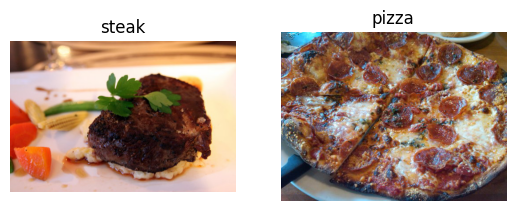

In [26]:
plt.figure()
plt.subplot(1,2,1)
img_steak = view_random_image(target_dir = "pizza_steak/train/", 
                        target_class = "steak")

plt.subplot(1,2,2)
img_pizza = view_random_image(target_dir = "pizza_steak/train/",
                              target_class = "pizza")



<Axes: >

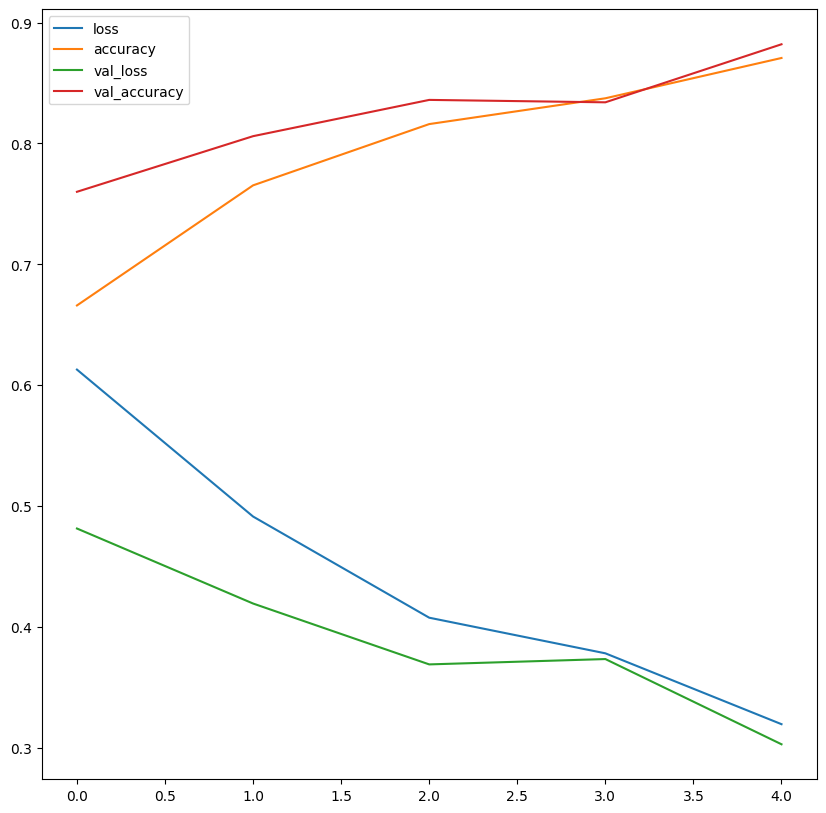

In [27]:
import pandas as pd

pd.DataFrame(history_1.history).plot(figsize=(10, 10))

In [28]:
def graph_history(model): 

  loss = model.history['loss']
  val_loss = model.history['val_loss']

  accuracy = model.history['accuracy']
  val_accuracy = model.history['val_accuracy']

  epochs = range(len(model.history['loss']))


  #loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss") 
  plt.plot(epochs, val_loss, label="val_loss") 
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  #acc
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy") 
  plt.plot(epochs, val_accuracy, label="val_accuracy") 
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()


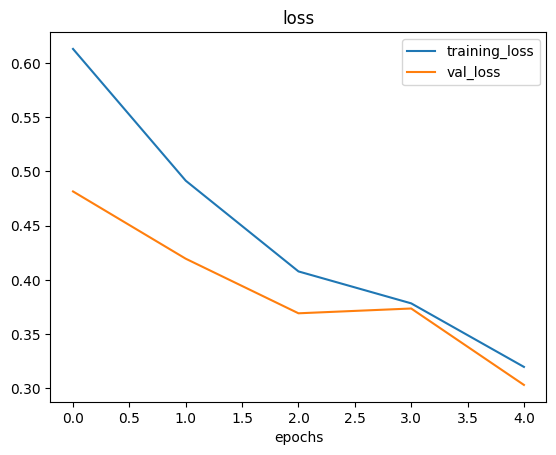

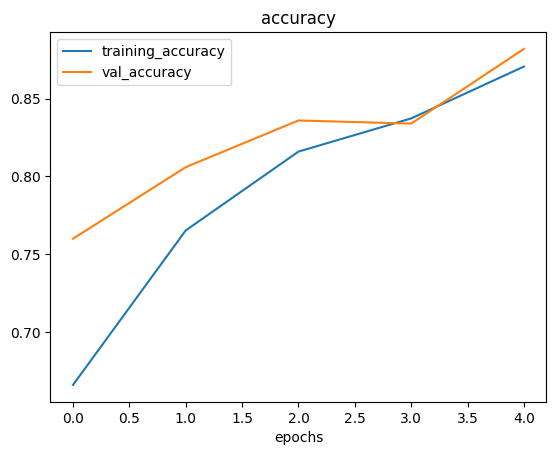

In [29]:
graph_history(history_1)

🔑 Note: When a model's validation loss starts to increase, it's likely that it's **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished. 

# The Structure of CNN 
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#image data generator generates batches of TENSOR IMAGE DATA 

train_datagen_2 = ImageDataGenerator(rescale = 1/255.)
test_datagen_2 = ImageDataGenerator(rescale = 1/255.)

In [31]:
train_data = train_datagen_2.flow_from_directory(train_dir, 
                                                 target_size = (224, 224), # height and width  
                                                 class_mode = "binary", # One of "categorical", "binary", "sparse", "input", or None. Default: "categorical". Determines the type of label arrays that are returned
                                                 batch_size = 32) # size of mini batches to load data into
                                                 
test_data = test_datagen_2.flow_from_directory(test_dir,
                                               target_size = (224, 224), 
                                               class_mode = "binary", 
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [32]:
# get the sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images / labels in train data
len(images), len(labels)



(32, 32)

In [33]:
# how many batches are there ?

len(train_data), 1500/32

(47, 46.875)

In [34]:
images[0].shape

(224, 224, 3)

In [35]:
labels, len(labels)

(array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
       dtype=float32),
 32)

In [36]:
# create a model (baseline = simple version and improve gradaully)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, 
           kernel_size = 3, 
           strides=1, 
           padding = "valid", 
           activation = "relu", 
           input_shape = (224, 224, 3)), 
    
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'), 
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1, activation = 'sigmoid')


])


model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


history_4 = model_4.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, 
                        validation_steps = len(valid_data))
                    


Epoch 1/5
47/47 [==============================] - 13s 232ms/step - loss: 0.8746 - accuracy: 0.6513 - val_loss: 0.4829 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 11s 238ms/step - loss: 0.4525 - accuracy: 0.8140 - val_loss: 0.3886 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 21s 447ms/step - loss: 0.3741 - accuracy: 0.8533 - val_loss: 0.3970 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 13s 283ms/step - loss: 0.2908 - accuracy: 0.8967 - val_loss: 0.3392 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 26s 554ms/step - loss: 0.1893 - accuracy: 0.9387 - val_loss: 0.3675 - val_accuracy: 0.8280


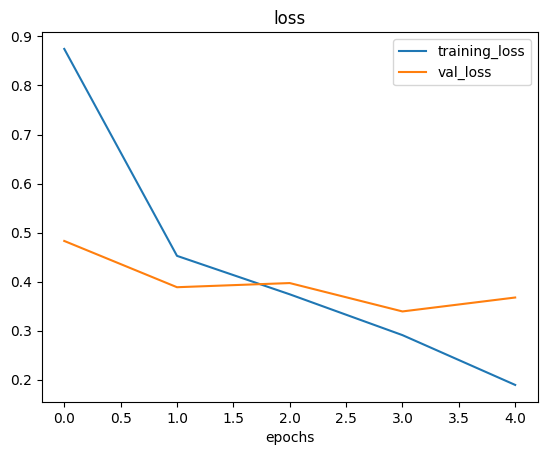

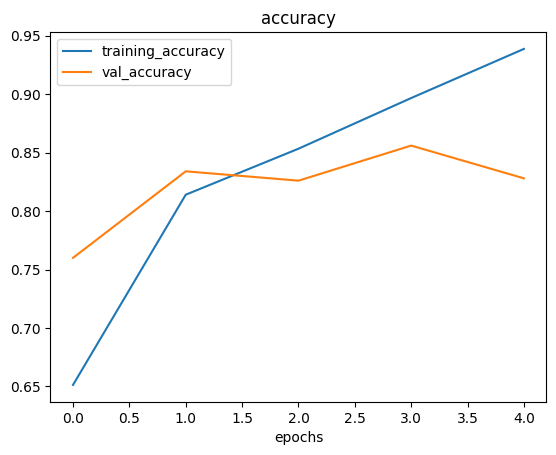

In [37]:
graph_history(history_4) # its overfitting btw (val_loss increases (model isn't good with new data))

# Making Predictions

--2023-04-26 05:08:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2023-04-26 05:08:12 (50.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



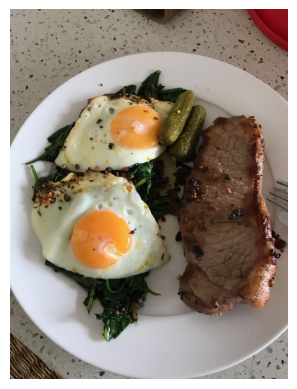

In [38]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [39]:
def load_to_tensor(filename, img_shape=224):

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels = 3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  return img/255.0


In [40]:
steak = load_to_tensor("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [41]:
#model_4.predict(steak) #will fail because model accepts batches of data rather than a single image

In [42]:
steak.shape

TensorShape([224, 224, 3])

In [43]:
steak = tf.expand_dims(steak, axis = 0)
steak.shape

TensorShape([1, 224, 224, 3])

In [44]:
model_4.predict(steak)

1/1 [==============================] - 0s 296ms/step


array([[0.82629794]], dtype=float32)

In [45]:
# the prediction comes as probabilty
# since its binary classification, <0.5 means pizza 0.5< means steak

def translate_prob(prob): 
  p = tf.round(prob)
  if (p == 1): 
    return class_names[1]
  elif (p == 0): 
    return class_names[0]



translate_prob(model_4.predict(steak))

1/1 [==============================] - 0s 44ms/step


'steak'

In [46]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [47]:
def plot_pred(model, filename, class_name):
  
  #load image
  img = load_to_tensor(filename)

  pred_prob = model.predict(tf.expand_dims(img, axis=0))

  pred_class = translate_prob(pred_prob)

  plt.imshow(img)
  plt.title("prediction: {}".format(pred_class))

  plt.axis(False)




1/1 [==============================] - 0s 43ms/step


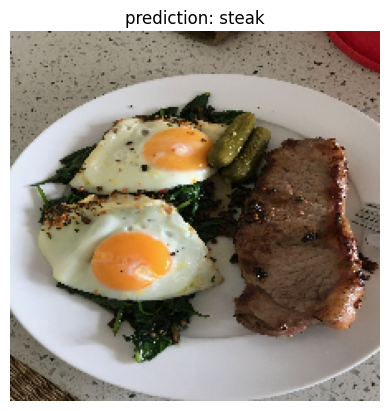

In [48]:
plot_pred(model_4, "03-steak.jpeg", class_names)


In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

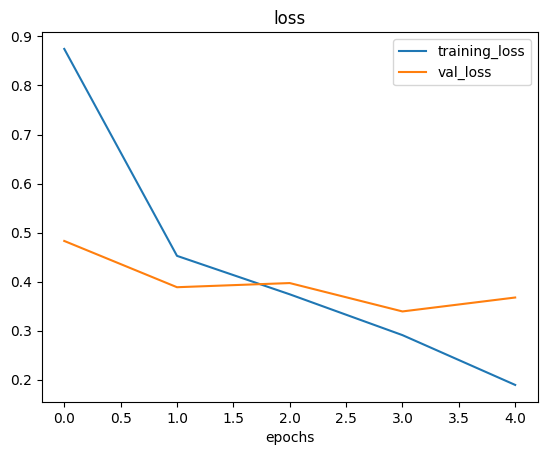

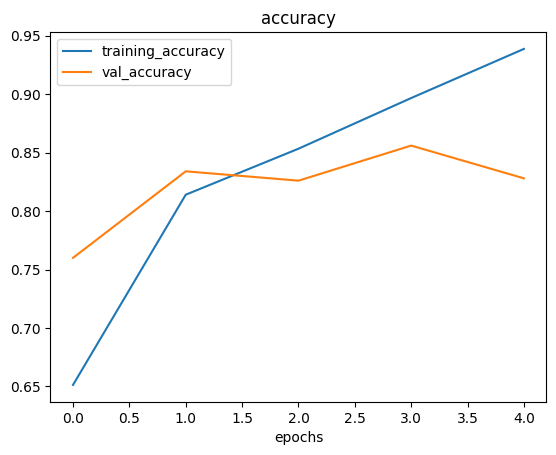

In [51]:
graph_history(history_4)

## Ways to reduce overfitting (AKA regularization)


*   add data augmentation
*   add regularization layers (such as maxpool2D)
*   add more data...

## Ways to induce overfitting
*   increase the number of conv layers
*   increase the number of conv filters
*   add another dense layer to the output of our flattend layer







In [52]:
model_5 = Sequential([
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(pool_size = 2), 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(), # scales down the input by taking the max value within the pool 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(),
    Flatten(), 
    Dense(1, activation='sigmoid')
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

history_5 = model_5.fit(train_data, 
                        epochs=5,
                        steps_per_epoch = len(train_data), 
                        validation_data = test_data, 
                        validation_steps = len(test_data))


Epoch 1/5
47/47 [==============================] - 14s 230ms/step - loss: 0.6749 - accuracy: 0.5727 - val_loss: 0.6232 - val_accuracy: 0.6140
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.5176 - accuracy: 0.7513 - val_loss: 0.3945 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4336 - accuracy: 0.8047 - val_loss: 0.3572 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4144 - accuracy: 0.8087 - val_loss: 0.3562 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 13s 272ms/step - loss: 0.4013 - accuracy: 0.8220 - val_loss: 0.3338 - val_accuracy: 0.8600


In [53]:
model_4.evaluate(test_data), model_5.evaluate(test_data)

16/16 [==============================] - 2s 143ms/step - loss: 0.3338 - accuracy: 0.8600


([0.3675483167171478, 0.828000009059906],
 [0.33379706740379333, 0.8600000143051147])

In [54]:
#summary 
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, None, None, 10)  

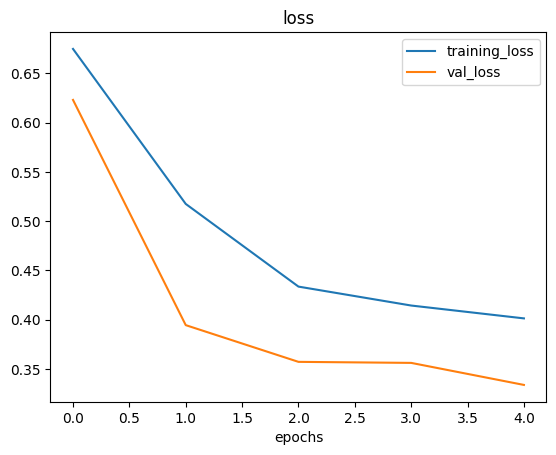

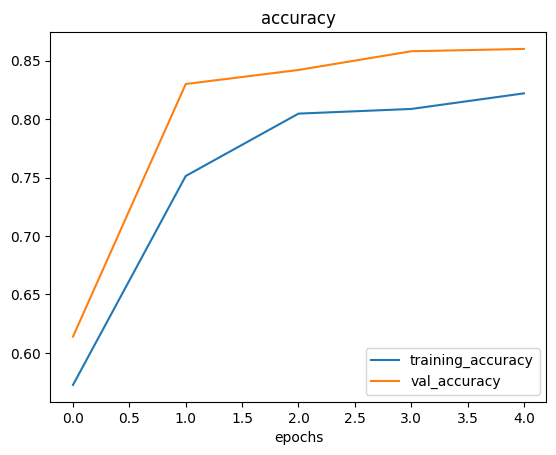

In [55]:
graph_history(history_5)

# Finding data augmentation

In [76]:
#create imagedatagenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255., 
                                             rotation_range = 0.2, 
                                             shear_range = 0.2, 
                                             zoom_range = 0.2, 
                                             width_shift_range=0.2, 
                                             height_shift_range=0.3, 
                                             horizontal_flip = True)

#create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

#create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

### what is data augmentation

alter the imamge in our training data to allow the model learn more generalizable patterns (hopefully). 
the diversity by altering mostly includes, adjustin gthe roation of an image, flipping it, cropping it


### code to visualize data augmentation

In [99]:
#import data and agument it from tranining directory 

IMAGE_SIZE = (224, 224)


print("Augmented training data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = IMAGE_SIZE,
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = False)


print("Augmented training data & shuffled: ")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = IMAGE_SIZE,
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = True)

#create non-augmented train data batches 
print("non-Augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size = IMAGE_SIZE, 
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = False)

#create non-augmented test data batches 
print("non-Augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMAGE_SIZE,
                                             batch_size = 32,
                                             class_mode = 'binary',
                                             shuffle = False)





Augmented training data: 
Found 1500 images belonging to 2 classes.
Augmented training data & shuffled: 
Found 1500 images belonging to 2 classes.
non-Augmented training data: 
Found 1500 images belonging to 2 classes.
non-Augmented test data: 
Found 500 images belonging to 2 classes.


**Note**: data augmentation is ususally only performed on the training data, using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the direction but are modified as they're loaded into the model

**images don't change in the directory, they are changed as they are loaded into the program**

In [98]:
images, labels = train_data.next()
augmented_images, augmented_labels= train_data_augmented.next() #labels aren't augmented

augmentedShuffled_images, augmentedShuffled_labels= train_data_augmented.next() 




showing image number : 12


(-0.5, 223.5, 223.5, -0.5)

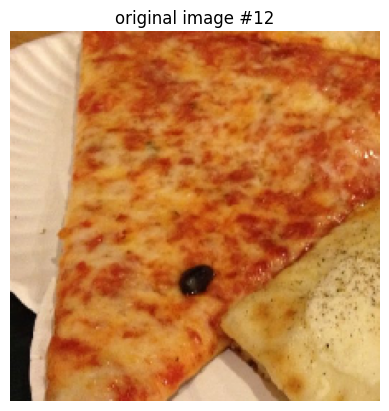

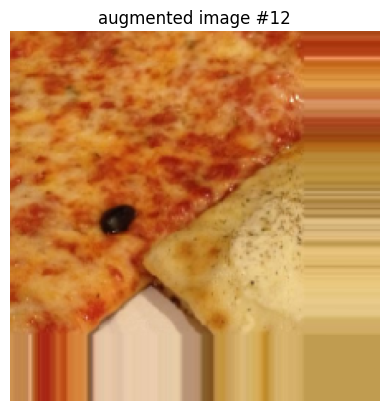

In [88]:
import random

random_number = random.randint(0, 32) #batch size = 32

print(f"showing image number : {random_number}")

plt.imshow(images[random_number])
plt.title(f"original image #{random_number}")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image #{random_number}")
plt.axis(False)


In [92]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, None, None, 10)  

In [95]:

#create a new model similar to model_5 and train it with augmented data

#model_5 = Sequential([
#     Conv2D(10, 3, activation = 'relu'), 
#     MaxPool2D(pool_size = 2), 
#     Conv2D(10, 3, activation = 'relu'), 
#     MaxPool2D(), # scales down the input by taking the max value within the pool 
#     Conv2D(10, 3, activation = 'relu'), 
#     MaxPool2D(),
#     Flatten(), 
#     Dense(1, activation='sigmoid')
# ])
model_6 = Sequential([
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(pool_size = 2), 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(), # scales down the input by taking the max value within the pool 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(),
    Flatten(), 
    Dense(1, activation='sigmoid')
])

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])


history_6 = model_6.fit(train_data_augmented, 
            epochs = 5, 
            steps_per_epoch = len(train_data_augmented), 
            validation_data = test_data, 
            validation_steps = len(test_data))




Epoch 1/5
47/47 [==============================] - 28s 534ms/step - loss: 0.7321 - accuracy: 0.4547 - val_loss: 0.6864 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 24s 518ms/step - loss: 0.6983 - accuracy: 0.5000 - val_loss: 0.6804 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 24s 522ms/step - loss: 0.6892 - accuracy: 0.5320 - val_loss: 0.6825 - val_accuracy: 0.5640
Epoch 4/5
47/47 [==============================] - 25s 522ms/step - loss: 0.6887 - accuracy: 0.5427 - val_loss: 0.6598 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 25s 526ms/step - loss: 0.6742 - accuracy: 0.6227 - val_loss: 0.6453 - val_accuracy: 0.5440


things I noticed: 


1.   accuracy is shit
2.   ETA is longer - the reason ETA is longer is the alteration of image as it's loaded into the model 


check the model's tranining curve

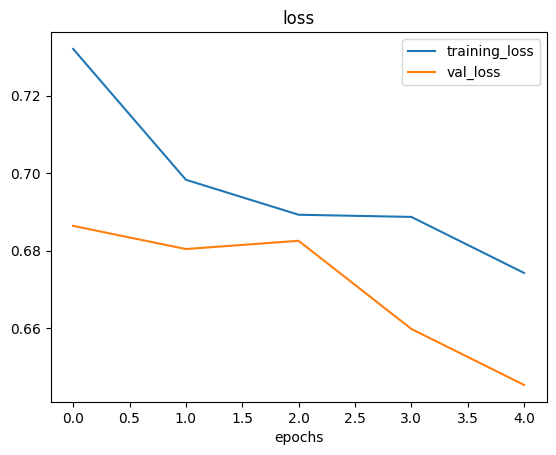

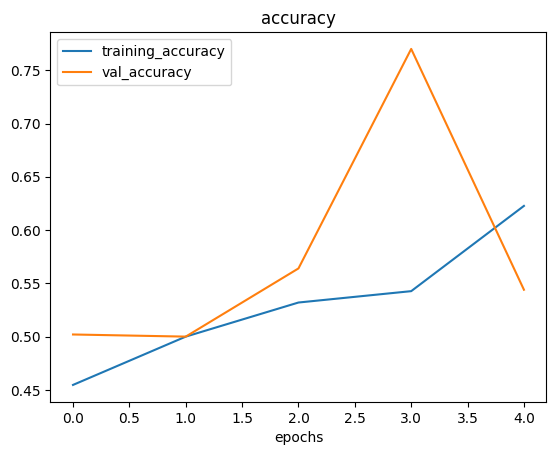

In [96]:
graph_history(history_6)

In [102]:
model_7 = Sequential([
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(pool_size = 2), 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(), # scales down the input by taking the max value within the pool 
    Conv2D(10, 3, activation = 'relu'), 
    MaxPool2D(),
    Flatten(), 
    Dense(1, activation='sigmoid')
])

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])


history_7 = model_7.fit(train_data_augmented_shuffled, 
            epochs = 5, 
            steps_per_epoch = len(train_data_augmented), 
            validation_data = test_data, 
            validation_steps = len(test_data))




Epoch 1/5
47/47 [==============================] - 27s 544ms/step - loss: 0.6508 - accuracy: 0.6060 - val_loss: 0.5953 - val_accuracy: 0.6620
Epoch 2/5
47/47 [==============================] - 24s 513ms/step - loss: 0.5559 - accuracy: 0.7353 - val_loss: 0.4243 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 24s 514ms/step - loss: 0.5208 - accuracy: 0.7553 - val_loss: 0.4645 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 24s 515ms/step - loss: 0.5011 - accuracy: 0.7707 - val_loss: 0.3696 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 24s 521ms/step - loss: 0.4914 - accuracy: 0.7613 - val_loss: 0.3717 - val_accuracy: 0.8420


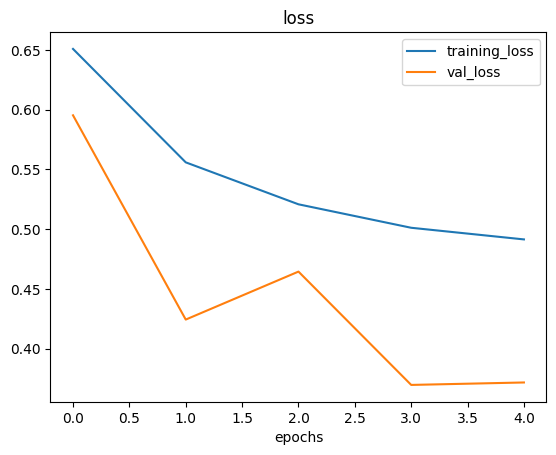

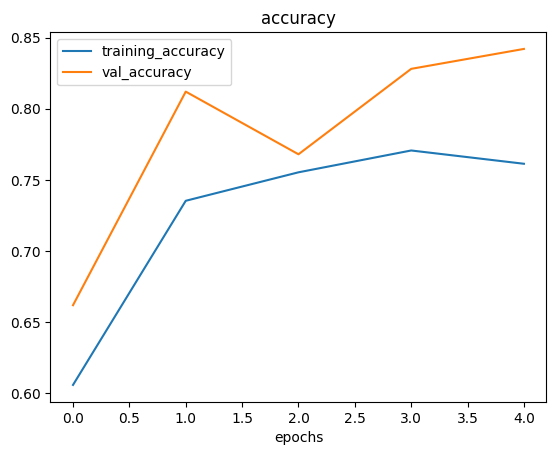

In [104]:
graph_history(history_7)

why is model_7 better than model_6: 

* if data is extracted sequentially the model first looks at pizza images then stake

* if data is shuffled, the model randomly looks at the images of stake and pizza interchangably


## Ways for improvement

*   increase the number of model layers (Conv2D and MaxPool2D)
*   increase number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
*   train for longer 
*   find an ideal learning rate 
*   get more data (give the model more opportunties to learn)
*   use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.





In [105]:
model_8 = Sequential([
    Conv2D(32, 3 , activation = 'relu'), 
    MaxPool2D(pool_size = 2), 
    Conv2D(32, 3, activation = 'relu'), 
    MaxPool2D(), # scales down the input by taking the max value within the pool 
    Conv2D(32, 3, activation = 'relu'), 
    MaxPool2D(),
    Flatten(), 
    Dense(1, activation='sigmoid')
])

model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])


history_8 = model_8.fit(train_data_augmented_shuffled, 
            epochs = 5, 
            steps_per_epoch = len(train_data_augmented), 
            validation_data = test_data, 
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 540ms/step - loss: 0.6914 - accuracy: 0.5713 - val_loss: 0.6007 - val_accuracy: 0.6460
Epoch 2/5
47/47 [==============================] - 25s 534ms/step - loss: 0.5680 - accuracy: 0.7140 - val_loss: 0.5271 - val_accuracy: 0.7000
Epoch 3/5
47/47 [==============================] - 25s 528ms/step - loss: 0.5010 - accuracy: 0.7620 - val_loss: 0.3459 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 24s 511ms/step - loss: 0.4775 - accuracy: 0.7860 - val_loss: 0.3391 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 24s 517ms/step - loss: 0.4628 - accuracy: 0.7900 - val_loss: 0.3767 - val_accuracy: 0.8380


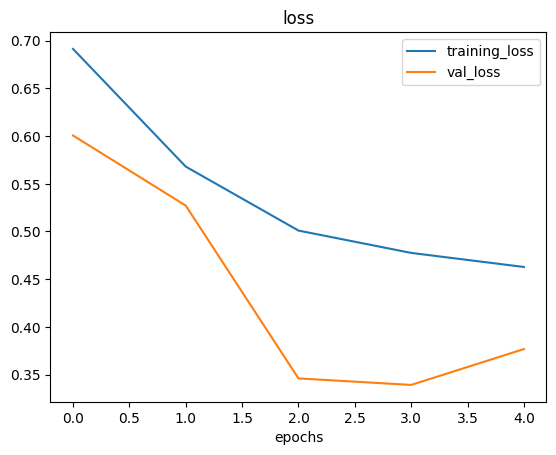

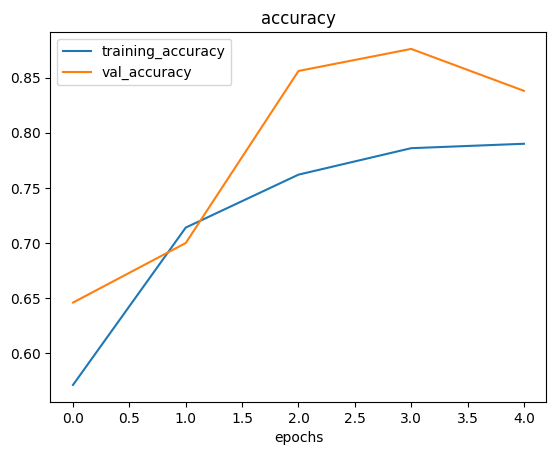

In [110]:
graph_history(history_8)

In [108]:
model_9 = Sequential([
    Conv2D(64, 3 , activation = 'relu'), 
    MaxPool2D(pool_size = 2), 
    Conv2D(64, 3, activation = 'relu'), 
    MaxPool2D(), # scales down the input by taking the max value within the pool 
    Conv2D(64, 3, activation = 'relu'), 
    MaxPool2D(),
    Flatten(), 
    Dense(1, activation='sigmoid')
])

model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])


history_9 = model_9.fit(train_data_augmented_shuffled, 
            epochs = 5, 
            steps_per_epoch = len(train_data_augmented), 
            validation_data = test_data, 
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 579ms/step - loss: 0.6243 - accuracy: 0.6407 - val_loss: 0.8129 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 25s 542ms/step - loss: 0.5523 - accuracy: 0.7280 - val_loss: 0.4188 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 25s 537ms/step - loss: 0.5076 - accuracy: 0.7540 - val_loss: 0.3667 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 25s 530ms/step - loss: 0.5256 - accuracy: 0.7580 - val_loss: 0.5584 - val_accuracy: 0.7460
Epoch 5/5
47/47 [==============================] - 25s 539ms/step - loss: 0.4735 - accuracy: 0.8020 - val_loss: 0.3928 - val_accuracy: 0.8260


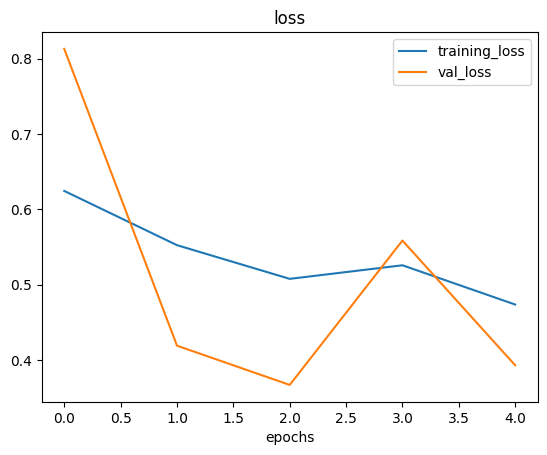

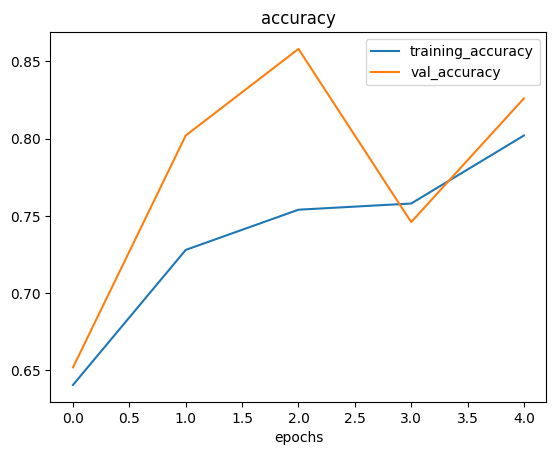

In [109]:
graph_history(history_9)

1/1 [==============================] - 0s 28ms/step


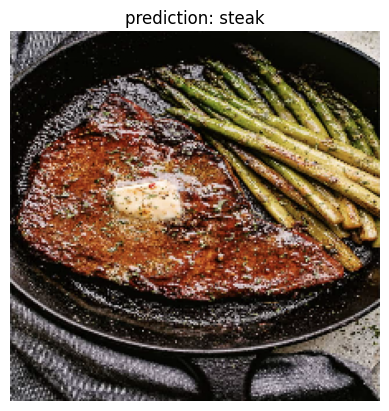

In [113]:
plot_pred(model_7, 'myimage.png', class_names)

1/1 [==============================] - 0s 24ms/step


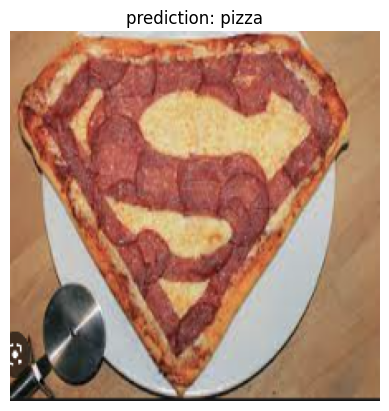

In [114]:
plot_pred(model_7, 'weirdPizza.png', class_names)

1/1 [==============================] - 0s 19ms/step


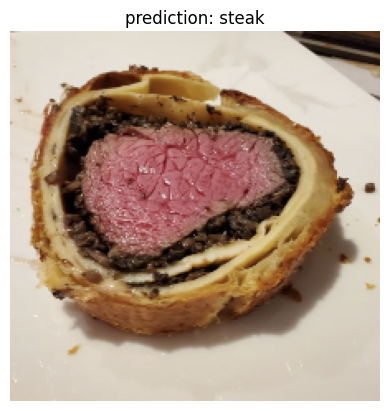

In [116]:
#beefWillington
plot_pred(model_7, 'beefWillington.png', class_names)